In [5]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
import torchaudio
import torch

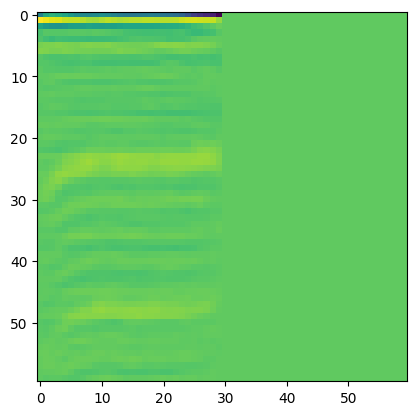

In [3]:
def mp3tomfcc(file_path, max_pad):
    audio, sample_rate = librosa.core.load(file_path)
    mfcc = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=60)
    pad_width = max_pad - mfcc.shape[1]
    mfcc = np.pad(mfcc, pad_width=((0, 0), (0, pad_width)), mode='constant')
    return mfcc

mfcc = mp3tomfcc("tone_perfect/a1_FV1_MP3.mp3", 60)
plt.imshow(mfcc)
plt.show()

In [15]:
file_path = "tone_perfect/a1_FV1_MP3.mp3"
audio1, sample_rate1 = librosa.core.load(file_path)
print(audio1[:10], sample_rate1)

audio2, sample_rate2 = torchaudio.load(file_path, format="mp3")
downsampling = torchaudio.transforms.Resample(sample_rate2, 22050)
audio2 = downsampling(audio2)
audio2 = torch.mean(audio2, dim=0)
sample_rate2 = 22050
print(audio2[:10].numpy(), sample_rate2)

[1.8589199e-05 3.0867755e-05 3.2007694e-05 2.5227666e-05 3.8988888e-05
 4.4144690e-05 2.9448420e-05 4.5079738e-05 7.3403120e-05 1.2752414e-04] 22050
[1.8391305e-05 3.0983651e-05 3.1983414e-05 2.5024627e-05 3.9357365e-05
 4.3628606e-05 3.0219811e-05 4.4190365e-05 7.4590382e-05 1.2641479e-04] 22050


In [17]:
mfcc1 = librosa.feature.mfcc(y=audio1, sr=sample_rate1, n_mfcc=60)
print(mfcc1.shape)
print(mfcc1[:5,:5])
plt.imshow(mfcc1)
plt.show()

transform = torchaudio.transforms.MFCC(sample_rate=sample_rate2, n_mfcc=60)
mfcc2 = transform(audio2).numpy()
plt.imshow(mfcc2)
plt.show()
print(mfcc2.shape)
print(mfcc2[:5,:5])


(60, 30)
[[-182.83005    -86.2233     -63.453495   -77.575134   -95.08523  ]
 [ 145.52187    129.82492    117.5923     111.117134    94.538284 ]
 [ -97.105835  -126.279076  -138.71811   -142.33203   -135.27039  ]
 [ -25.390778    -9.048001   -11.356473   -10.937636   -10.9261465]
 [ -18.443775   -34.240738   -42.378944   -33.629192   -35.211823 ]]
(60, 76)
[[-404.27094   -210.72574   -142.38316    -73.38528    -50.98903  ]
 [  82.09244     91.09258     93.43731     94.68965     56.891556 ]
 [ -42.605186   -85.31177   -119.52321   -157.20796   -151.84813  ]
 [ -56.9112     -70.41463    -53.76805    -44.057774   -34.075558 ]
 [ -10.5349045  -24.224083   -37.21537    -39.592575   -45.594284 ]]


/Users/brandonng/anaconda3/envs/nus/lib/python3.10/site-packages/torchaudio/functional/functional.py:576: UserWarning: At least one mel filterbank has all zero values. The value for `n_mels` (128) may be set too high. Or, the value for `n_freqs` (201) may be set too low.
  warnings.warn(
